In [1]:
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500) #show all columns
import os
pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x) #display eventual float format
os.listdir()

['.ipynb_checkpoints',
 'archive (1).zip',
 'instagram_locations.csv',
 'instagram_posts.csv',
 'instagram_profiles.csv',
 'ordinato.ipynb']

## **[RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.**







### **Plot the number of posts for each profile in descending order.**

In [4]:
profiles_n_posts = pd.read_csv('instagram_profiles.csv', sep = '\t', usecols=['profile_id','profile_name','n_posts'])
#sort values by the number of posts in descending order, after dropping NA values
profiles_n_posts_sorted=profiles_n_posts.dropna(subset=['n_posts']).sort_values(by="n_posts", ascending=False)
profiles_n_posts_sorted

,profile_id,profile_name,n_posts
3990313,1.996648e+08,jasem33312,183730.0
2571453,8.563367e+09,koenigpic,142428.0
4338921,1.273455e+09,rudyanto62,126340.0
3942129,9.813508e+06,hometown_ni,125220.0
4219642,1.607309e+09,dwfitfiber_thailand,117262.0
...,...,...,...
2402230,1.050933e+10,faith.dever,0.0
2402229,8.779595e+09,sugarsprinkledglitter,0.0
377966,8.618561e+08,hannahkraft13,0.0
2402225,4.117964e+09,4pf_cj_,0.0


As it is possible to see from this sorted table, there are some profiles which have a number of posts with a magnitude order of $10^5$, while in the tail it is evident that many profiles have zero posts that is actually plausible.

###  What posts have the highest number of _likes_?

In [74]:
#read only the columns of the files which contains the post id and and the number of likes
posts_n_of_like=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['post_id','numbr_likes'])
#sort in descending order and return the first 10 rows after removing NA values
posts_n_of_like.dropna(subset=["numbr_likes"]).sort_values(by="numbr_likes", ascending=False).head(10)

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0
6293907,BwTSXBKg7gN,3586546.0
19624086,Btw8pFXAvQm,3558599.0
19802016,BvC3n6_gqin,3533326.0
30850564,Bw7vqLrFkHi,3340297.0
39812576,Bw2gTH1AiDA,3311246.0


In this table it is possible to observe the post id of posts with the higher number of likes which has a magnitude order of $10^6$.

### What posts have the most and the least number of comments?

In [ ]:
#read only the columns of post with the post id and the number of comments
posts_n_of_comment=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['post_id','number_comments'])

#filter only for the post id which have a significative number of posts(e.g. not equal to zero)
posts_n_of_comment=posts_n_of_comment[posts_n_of_comment["number_comments"]!=0]

#sort by number of comments in descending order after removing eventual NA values
posts_n_of_comments_sorted=posts_n_of_comment.dropna(subset=["number_comments"]).sort_values(by="number_comments", ascending=False)

In [95]:
#return the first ten rows to have the post with the most number of comments
posts_n_of_comments_sorted.head(10)

,post_id,number_comments
41873060,Bx2sPAjHviO,488953.0
12164781,BuGjhWAhAW5,313997.0
33261751,BJ-rkpTgn1N,257488.0
11149127,BMtisIxjhtT,214365.0
9383817,BzOOWj3DfZK,189888.0
5427268,BoQoM-JFkPA,180635.0
25257169,Bwarws1lCok,173988.0
6220011,Bt4qlVDAZMH,170836.0
31689573,Bs9NhQkAcJA,166919.0
14257307,Bzqb95QI_1E,166198.0


In [490]:
#return the last ten rows to show posts withthe least number of comments different from 0 (e.g. > 0)
posts_n_of_comments_sorted.tail(n=10)

,post_id,number_comments
17510513,BvLC0JAheeI,1.0
17510522,Bu-RNK6AIjw,1.0
17510528,Bujp9mfAJGb,1.0
33713319,BuZ153vgPc-,1.0
17510546,Bu2vLi5hkIr,1.0
17510553,Bl04rwkAtZx,1.0
17510557,BlQ9YL7gdBH,1.0
17510559,BlQtw_-g2R4,1.0
17510562,Bs8W7IDlcQa,1.0
1,BVg0pbolYBC,1.0


The number of comments is lower than the number of likes that is obvious since a like is a more immediate reaction than a comment.

### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [180]:
#read only the column with the location id
posts_locations=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['profile_id', 'location_id' ])
#calculate the percentage of posts with location over the total by considering the number of rows in which there are not NA
posts_with_location=posts_locations['location_id'].notnull().values.sum()/posts_locations.shape[0]*100
#repeat for posts without location as the numers of rows with NA values over the total
posts_without_location=posts_locations['location_id'].isnull().values.sum()/posts_locations.shape[0]*100

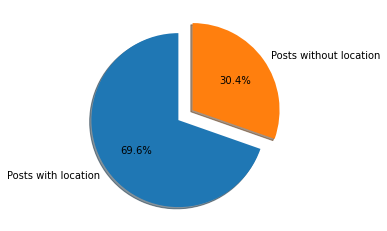

In [146]:
#plot a pie chart with the proportion
labels=('Posts with location', "Posts without location")
sizes=[posts_with_location, posts_without_location]
explode=(0.1, 0.1)
pie_chart=plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.show()

According to this analysis users tend to add locations to their posts in the around 70% of the cases probably due to the fact that in this way they could let their followers know where they are without explicitely stating it in the post caption. Moreover if the profile is public, adding locations will give more exposure on instagram and this could be useful for example for business purposes, in particular in the case of a business account.

### How many posts include only photos? How many also have videos?

In [107]:
#read only the column with posts type
posts_type=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['post_type'])

In [109]:
#filter for the posts which contains only photo and print the shape of the column (number of rows)
print("The number of posts including only photos is: ", posts_type[posts_type["post_type"]==1].shape[0])

The number of posts including only photos is:  41534486


In [110]:
#filter for the posts which are multy-type and print the shape of the column
print("The number of posts including also video is: ", posts_type[posts_type["post_type"]==3].shape[0])

The number of posts including also video is:  40943


### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [112]:
#read only the column which indicates if the account is business or not
profiles_business=pd.read_csv('instagram_profiles.csv', sep = '\t', usecols=['is_business_account'])

In [147]:
#return the proportion of business accounts on the total (business accounts/total dimension of the column), considering the NA values as False
print("The percentage of business accounts is:", round((profiles_business.loc[:,"is_business_account"]==True).sum()/(profiles_business.shape[0])*100, 2),"%")

The percentage of business accounts is: 18.97 %


In [119]:
#repeat operation removing NA not considering NA as False
print("The percentage of business accounts is:", round((profiles_business.loc[:,"is_business_account"]==True).sum()/(profiles_business.dropna().shape[0])*100, 2), "%")

The percentage of business accounts is: 24.82 %




## [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.



### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [249]:
post = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id','location_id','numbr_likes','number_comments','post_type','post_id','description']) 

In [316]:
def post_extraction(profile_id, df):
    ''' profile_id : profile_id in which we are interested to have the post
    df : profile dataframe
    the function returns the post id for the choosen user while print none for the user in the case inside 
    the database there is not any user with that profile_id'''
    if df.loc[df['profile_id'] ==profile_id ].shape[0] >=1: #the profile id should be at least one time in the post dataset
        return df.loc[df['profile_id'] ==profile_id ]['post_id'].values
    else:
        return None

In [319]:
#try post_extraction function
post_extraction(profile['profile_id'][2], post)

array(['BtgBr-hHXez', 'Bs04k58nGY6', 'BzBbR1YAU81', 'By_mhIkAyyY',
       'Bx95gbegM7R', 'BxrrTRmhtlt', 'BxPfAzeHn7Q', 'BvoQOd7Hr5Q',
       'BvU4ZuAnZdy', 'BvIFGeGnpTf', 'BuxD55_nB5A', 'Bt5rpNfnBkp'],
      dtype=object)

### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [367]:
def post_n_top_posted(n):
    ''' n is the number of the user that you want to see which have posted more'''
    lista = []
    top_10_profile_per_posts_profile_name = list(profile.sort_values(by = 'n_posts', ascending = False).reset_index(drop=True).loc[:n-1]['profile_name'].values)
    top_10_profile_per_posts_profile_id = list(profile.sort_values(by = 'n_posts', ascending = False).reset_index(drop=True).loc[:n-1]['profile_id'].values)
    for i,j in zip(top_10_profile_per_posts_profile_id, top_10_profile_per_posts_profile_name):
        lista.append([post_extraction(i,post),j,i])
    return lista
#the function returns a list with the post id, the username and the profile id of the n top posted profiles

In [368]:
#try the post_n_top_posted function
post_n_top_posted(3) 

[[array(['Bq3hP3Khp8J', 'Bq3hN53hUsD', 'BCqCe9LypeF', '20Wu4zypd2',
         'BrKq76AhadU', 'Bq_MjFzB_Wt', 'Bq_MiKhhP05', 'BpQ2cmKF-W0',
         '3V4OeXypTT', 'BzUmjr2pgni', 'BzUmictJSO1', 'BzUmhW0pjrN',
         'BzUmgscJEK4', 'BzUmgBYJzoS', 'BzUmfZspDqA', 'BzUmejDptYx',
         'BzUmdnupYxW', 'BzUmcZRpTTn', 'BzScUjhJiwK', 'BzRkojLJBMQ',
         'BzRkmb3JXea'], dtype=object),
  'jasem33312',
  199664772.0],
 [array(['BxJpvMrpl0n', 'BxJpeX2pXeN', 'BxJptNSpk6g', 'BxJpzW4J6Aq',
         'BxJpgQMJa66', 'BxJp2qgpVJo', 'BxJpxSLp4rB', 'BxJpcZ0JRqN',
         'BxJp4i3pArJ', 'BxJpq3dppxY', 'BxJp6dVJvtO', 'BxJposzpeA7',
         'BxJpmohpwK2', 'BxJpkrrJ0b3', 'BxJpijSJd_f'], dtype=object),
  'koenigpic',
  8563366588.0],
 [array(['BpfufadAl1f', 'Bz6mD1VpaJB', 'BuCyAT8Abu3', 'BxD_1nXgoBG',
         'BvYZl1yAubo', 'BrkhuwcATjv', 'BwMTtZ5g4RY', 'Brt9v5VATSp',
         'Bx7F9xKJCN2', 'BvNCnhMgdAl', 'ByBp307pDMh', 'ByPPM0Mps4a',
         'ByPPFlhJrbA', 'Bz7fTyVpLLQ', 'Bz7a1vgJzl2', 'Bz6mutIJCHA',


### What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [378]:
lista = post_n_top_posted(10) #call post_n_top_posted with n=10
for i in range(len(lista)):
    print('__________')
    print('For user', lista[i][1]) #lista[1] profile_name
    print('Number of likes:', post[post['profile_id']==lista[i][2]]['numbr_likes'].mean()) #lista[2] profile_id
    print('Number of comments:', post[post['profile_id']==lista[i][2]]['number_comments'].mean())

__________
For user jasem33312
Number of likes: 7.666666666666667
Number of comments: 0.0
__________
For user koenigpic
Number of likes: 0.0
Number of comments: 0.0
__________
For user rudyanto62
Number of likes: 2.96
Number of comments: 0.04
__________
For user hometown_ni
Number of likes: 0.2962962962962963
Number of comments: 0.0
__________
For user dwfitfiber_thailand
Number of likes: 1.5405405405405406
Number of comments: 0.0
__________
For user waxking911
Number of likes: 2.026315789473684
Number of comments: 0.18421052631578946
__________
For user gamt_official
Number of likes: 6.477611940298507
Number of comments: 0.04477611940298507
__________
For user collarosedw_official
Number of likes: 0.4
Number of comments: 0.04
__________
For user gamt_authentic
Number of likes: 3.921875
Number of comments: 0.0
__________
For user ivankkkka.trmp
Number of likes: nan
Number of comments: nan


  
   
### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

Need part 3 to do it

## [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.


### Plot the top 10 most popular users in terms of followers and their number of posts.



In [362]:
profile = pd.read_csv('instagram_profiles.csv',sep='\t',
                      usecols = ['sid', 'profile_id','profile_name','followers','n_posts'])
profile.head(1)

,sid,profile_id,profile_name,followers,n_posts
0,4184446,4721049632.0,jphillip033,146.0,170.0


In [16]:
profile_top_10=profile.sort_values(by='followers', ascending=False)[:10] #take only the first ten lines of the sorted dataset
profile_top_10[['profile_name','n_posts']]

,profile_name,n_posts
2880218,instagram,5760.0
2582507,victoriassecret,7355.0
3820939,nba,28816.0
701965,louisvuitton,3352.0
2414951,buzzfeedtasty,2791.0
2785241,andresiniesta8,990.0
333193,hm,4566.0
3934581,princessyahrini,4719.0
1311970,danbilzerian,1311.0
1703764,akshaykumar,1173.0


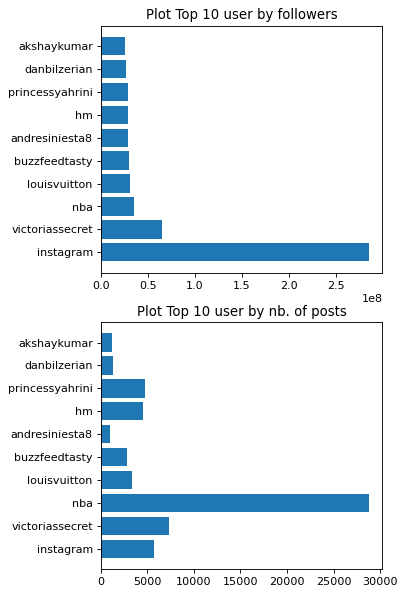

In [17]:
fig = plt.figure(figsize=(10, 9), dpi=80)
ax = fig.add_subplot(221)
plt.title('Plot Top 10 user by followers')
plot_followers=plt.barh(profile_top_10['profile_name'], profile_top_10['followers'])
ax = fig.add_subplot(223)
plt.title('Plot Top 10 user by nb. of posts')
plot_posts=plt.barh(profile_top_10['profile_name'],profile_top_10['n_posts'])
plt.show()

### Who is the most influential user?


As the question mentioned if we consider the number of followers, **Instagram** seems to be the most influential one but the situation could change when we consider the number of posts, in this case the **nba** account looks the most influential one. 

### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited

In [86]:
profile_top_10.reset_index(inplace = True, drop = True)
# now we search for the post with location
post = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id','location_id','numbr_likes','number_comments','post_type']) 

In [107]:
top_10_df = profile_top_10.merge(post, on ='profile_id', how='inner')
#in this datset we have only the post with location made by the 10 top user
top_10_df

,sid,profile_id,profile_name,followers,n_posts,location_id,post_type,numbr_likes,number_comments
0,336492,25025320.0,instagram,285457645.0,5760.0,5.332856e+06,1,125428.0,1240.0
1,336492,25025320.0,instagram,285457645.0,5760.0,5.873874e+08,1,669786.0,4818.0
2,336492,25025320.0,instagram,285457645.0,5760.0,8.770667e+14,1,1914299.0,20065.0
3,336492,25025320.0,instagram,285457645.0,5760.0,3.500213e+08,1,840588.0,3627.0
4,336492,25025320.0,instagram,285457645.0,5760.0,5.243120e+08,1,385494.0,5664.0
...,...,...,...,...,...,...,...,...,...
136,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,241543.0,1152.0
137,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,797506.0,2733.0
138,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,921671.0,9349.0
139,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,1402087.0,16180.0


Now we do the same things in order to have the city name for each location_id (when the information is available).

In [133]:
location = pd.read_csv( 'instagram_locations.csv', sep='\t', usecols = ['id','name','lat','lng'])

In [134]:
top_10_df_location  = top_10_df.dropna(subset='location_id').groupby(['profile_id','location_id']).count().reset_index()
top_10_df_location = top_10_df_location[['profile_id','location_id','sid']].rename(columns ={'sid':'count_location'})
top_10_df_location = top_10_df_location.sort_values(by='count_location', ascending=False).reset_index(drop=True)
top_10_df_location = top_10_df_location.merge(profile_top_10[['profile_id','profile_name']], how='left')
top_10_df_location = top_10_df_location.merge(location.rename(columns ={'id':'location_id','name':'post_place_name'}), how='left')

In [164]:
top_10_df_location[:10]

,profile_id,location_id,count_location,profile_name,post_place_name,lat,lng
0,24239929.0,2.130118e+08,9,princessyahrini,"Sydney, Australia",151.207970,-33.867510
1,496865116.0,3.669021e+08,3,andresiniesta8,"Kobe-shi, Hyogo, Japan",135.191300,34.696400
2,24239929.0,1.906910e+15,2,princessyahrini,"Bora Bora, French Polynesia",-151.751991,-16.505823
3,50417061.0,1.731498e+15,2,danbilzerian,Bel-Air Estate,-118.454550,34.089880
4,20824486.0,1.027474e+09,2,nba,Wells Fargo Center,-75.171187,39.901452
5,3416684.0,2.626063e+08,1,victoriassecret,666 Fifth Avenue,-73.976204,40.760163
6,25025320.0,3.500213e+08,1,instagram,Parkland County,-114.006000,53.530000
7,25025320.0,1.011689e+09,1,instagram,Leuser Ecosystem,96.847161,3.743398
8,25025320.0,8.385239e+08,1,instagram,Stanislaus National Forest,-121.291619,38.139407
9,25025320.0,7.113485e+08,1,instagram,Hadleigh Park,0.595682,51.551175


The most frequent location results to be Sidney(Australia), tagged by the account of **princessyahrini**, while the second one is Kobe-shi(Japan) tagged by **andresiniesta8**. Then we have some locations tagged two times and others only one time. It's evident that **instagram** changed location in every published post, while **princessyahrini** published some posts with the same location. We can suppose that users could have tagged a location when they visited a new place and they wanted to show it to their followers.

### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [23]:
for i in top_10_df['profile_name'].unique():
    print('_______________')
    print(i)
    print('The number of photo :',top_10_df[(top_10_df['profile_name']==i) & (top_10_df['post_type']==1)].shape[0])
    print('Video:',top_10_df[(top_10_df['profile_name']==i) & (top_10_df['post_type']==2)].shape[0])
print('\n With mixed type there are not any posts')

_______________
instagram
The number of photo : 31
Video: 3
_______________
victoriassecret
The number of photo : 5
Video: 2
_______________
nba
The number of photo : 13
Video: 5
_______________
louisvuitton
The number of photo : 1
Video: 0
_______________
buzzfeedtasty
The number of photo : 13
Video: 0
_______________
andresiniesta8
The number of photo : 12
Video: 0
_______________
hm
The number of photo : 2
Video: 0
_______________
princessyahrini
The number of photo : 23
Video: 3
_______________
danbilzerian
The number of photo : 15
Video: 0
_______________
akshaykumar
The number of photo : 13
Video: 0

 With mixed type there are not any posts


The number of posts of the top 10 users which are only photo is: 91 %
The number of posts of the top 10 users which are only video is: 9 %


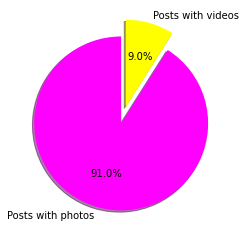

In [162]:
#calculate the percentage of posts with only photos and only videos
n_photo=round(top_10_df[top_10_df['post_type']==1].shape[0]/top_10_df['post_type'].value_counts().sum()*100)
n_video=round(top_10_df[top_10_df['post_type']==2].shape[0]/top_10_df['post_type'].value_counts().sum()*100)

print('The number of posts of the top 10 users which are only photo is:', n_photo, '%')
print('The number of posts of the top 10 users which are only video is:', n_video, '%')

#plot in a pie chart the percentage of photos and videos
labels=('Posts with photos', "Posts with videos")
sizes=[n_photo, n_video]
explode=(0.1, 0.1)
colors=['magenta', 'yellow']
pie_chart=plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors) 
plt.show()


### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? 


In [179]:
print('Sum of likes for photo:', int(top_10_df[top_10_df['post_type']==1]['numbr_likes'].sum()) )
print('Sum of comments for photo:', int(top_10_df[top_10_df['post_type']==1]['number_comments'].sum()) )
top_10_df[top_10_df['post_type']==1][['numbr_likes','number_comments']].describe()
# where the count below represent the number of post that contains only pitcures

Sum of likes for photo: 69285634
Sum of comments for photo: 497013


,numbr_likes,number_comments
count,128.0,128.0
mean,541294.015625,3882.9140625
std,502641.388938992167823,4830.2742052670682824
min,20749.0,0.0
25%,105708.75,507.75
50%,294018.0,2260.5
75%,926834.5,5461.0
max,2331497.0,24621.0


In [180]:
print('Sum of likes for videos:', int(top_10_df[top_10_df['post_type']==2]['numbr_likes'].sum()) )
print('Sum of comments for videos:', int(top_10_df[top_10_df['post_type']==2]['number_comments'].sum()) )
top_10_df[top_10_df['post_type']==2][['numbr_likes','number_comments']].describe()
# where the count below represent the number of post that contains only videos

Sum of likes for videos: 3464814
Sum of comments for videos: 26258


,numbr_likes,number_comments
count,13.0,13.0
mean,266524.15384615387301892,2019.8461538461538112
std,213533.16002744794241153,2290.24055673029852187
min,35689.0,323.0
25%,157695.0,529.0
50%,198356.0,868.0
75%,331442.0,2929.0
max,749724.0,6714.0


In [184]:
print('We do not have any value or any statistics for mixed type posts')
top_10_df[top_10_df['post_type']==3][['numbr_likes','number_comments']]

We do not have any value or any statistics for mixed type posts


,numbr_likes,number_comments


#### Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [219]:
top_10_df

,sid,profile_id,profile_name,followers,n_posts,location_id,post_type,numbr_likes,number_comments
0,336492,25025320.0,instagram,285457645.0,5760.0,5332856.0,1,125428.0,1240.0
1,336492,25025320.0,instagram,285457645.0,5760.0,587387369.0,1,669786.0,4818.0
2,336492,25025320.0,instagram,285457645.0,5760.0,877066659067597.0,1,1914299.0,20065.0
3,336492,25025320.0,instagram,285457645.0,5760.0,350021298.0,1,840588.0,3627.0
4,336492,25025320.0,instagram,285457645.0,5760.0,524311966.0,1,385494.0,5664.0
...,...,...,...,...,...,...,...,...,...
136,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,241543.0,1152.0
137,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,797506.0,2733.0
138,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,921671.0,9349.0
139,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,1402087.0,16180.0


In [216]:
top_10_groupby_df = top_10_df.groupby('profile_name').sum().reset_index() #reset index on order to scan by index with the for loop

In [229]:
top_10_groupby_df #with groupby the dataset is grouped by the profile name and then the sum function is applied

,profile_name,sid,profile_id,followers,n_posts,location_id,post_type,numbr_likes,number_comments
0,akshaykumar,45671665,11791329992.0,26252169.0,15249.0,1653066228336077.0,13,13352324.0,85572.0
1,andresiniesta8,41247528,5962381392.0,29542143.0,11880.0,2019566475639570.0,12,5676272.0,26845.0
2,buzzfeedtasty,3800667,27631587074.0,30246783.0,36283.0,284407070.0,13,1311218.0,12521.0
3,danbilzerian,7622100,756255915.0,26476004.0,19665.0,3462999176842407.0,15,12946699.0,128921.0
4,hm,317380,46820160.0,29176804.0,9132.0,613921984.0,2,162427.0,730.0
5,instagram,11440728,850860880.0,285457645.0,195840.0,3359947015132448.0,37,29864166.0,225050.0
6,louisvuitton,330376,187619120.0,30689316.0,3352.0,5590714.0,1,186857.0,867.0
7,nba,6067746,374840748.0,35339708.0,518688.0,1531514066974584.0,23,4185542.0,19276.0
8,princessyahrini,93994004,630238154.0,29042823.0,122694.0,5819194325758728.0,29,3388378.0,20131.0
9,victoriassecret,2599898,23916788.0,65269440.0,51485.0,3852820710127985.0,9,1676565.0,3358.0


Summing after groupby is ok for the number of likes and comments which is associated to each post while is not good for the number of followers which is linked instead to each profile.
Due to that in top_10_groupby_df the number of followers cannot be used since it was obtained summing the correct one for each occurence of the profile_name. 
To obtain the correct one we decided to groupby after dropping duplicates and retrieve the number of followers associated to each row in the for loop.

In [21]:
top_10_df_duplicates=top_10_df.drop_duplicates(subset='profile_name').reset_index(drop=True).groupby('profile_name').sum()
top_10_df_duplicates #reset index to carry out the for loop in an easier way

,sid,profile_id,followers,n_posts,location_id,post_type,numbr_likes,number_comments
profile_name,,,,,,,,
akshaykumar,3513205,9.070254e+08,26252169.0,1173.0,1.653066e+15,1,382877.0,654.0
andresiniesta8,3437294,4.968651e+08,29542143.0,990.0,1.793700e+05,1,604503.0,3222.0
buzzfeedtasty,292359,2.125507e+09,30246783.0,2791.0,0.000000e+00,1,77185.0,504.0
danbilzerian,508140,5.041706e+07,26476004.0,1311.0,2.222444e+08,1,266200.0,3290.0
hm,158690,2.341008e+07,29176804.0,4566.0,3.846191e+08,1,116059.0,642.0
instagram,336492,2.502532e+07,285457645.0,5760.0,5.332856e+06,1,125428.0,1240.0
louisvuitton,330376,1.876191e+08,30689316.0,3352.0,5.590714e+06,1,186857.0,867.0
nba,337097,2.082449e+07,35339708.0,28816.0,6.294880e+05,1,164521.0,1415.0
princessyahrini,3615154,2.423993e+07,29042823.0,4719.0,6.451783e+08,1,55212.0,699.0


In [22]:
for i in top_10_groupby_df.index:
    print('__________')
    print(top_10_groupby_df['profile_name'][i])
    likes_i = top_10_groupby_df['numbr_likes'][i]
    comments_i = top_10_groupby_df['number_comments'][i]
    followers_i = top_10_df_duplicates['followers'][i] #retrieve the number of followers from the dropped datset
    print('Proportion of likes respect to followers:', likes_i/followers_i*100,'%')
    print('Proportion of comments respect to followers:', comments_i/followers_i*100,'%')
print('\n With mixed type there are not any posts')

__________
akshaykumar
Proportion of likes respect to followers: 50.8617935531346 %
Proportion of comments respect to followers: 0.3259616376841091 %
__________
andresiniesta8
Proportion of likes respect to followers: 19.214151119639492 %
Proportion of comments respect to followers: 0.09087018500993649 %
__________
buzzfeedtasty
Proportion of likes respect to followers: 4.335065980405255 %
Proportion of comments respect to followers: 0.0413961378967145 %
__________
danbilzerian
Proportion of likes respect to followers: 48.899747106851926 %
Proportion of comments respect to followers: 0.48693526409801113 %
__________
hm
Proportion of likes respect to followers: 0.5566990819145236 %
Proportion of comments respect to followers: 0.0025019875377714435 %
__________
instagram
Proportion of likes respect to followers: 10.461855383133985 %
Proportion of comments respect to followers: 0.07883831592599315 %
__________
louisvuitton
Proportion of likes respect to followers: 0.608866616642743 %
Prop